<a href="https://colab.research.google.com/github/Xiyao-Song/Xiyao-Song/blob/main/Demo%20of%20Flood%20Risk%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Project Demo  

> ## Flood Zones & Evacuation Routes In Honolulu County, Hawaii

---

![Hawaii](https://media.licdn.com/dms/image/C561BAQEsY4p9TbYG6g/company-background_10000/0/1583893887979?e=2147483647&v=beta&t=2a69CpEbCkhyMGfIo_JzczfM_d6jPnxnxqck5npkfKg)



## Research Question
> Where is the safest place in each island of the Hawaii islands during flooding events?





Due to changes in precipitation, sea-level rise, and changes in sea surface temperature — the main factors contributing to the risk of flooding, one of the deadliest natural disasters —  Oahu island, an island in the center of the Pacific Ocean known as a popular tourist destination, is at risk of flooding.

Sea-level rise and increasing frequencies of tsunamis and hurricanes put the Hawaii islands at great risk. The objective of this research is to determine the risk of flooding during a tsunami for roads and different types of buildings, including residential and commercial, as well as other social facilities.

Then, among all these types of buildings, the analysis aim to find the safest palce during a tsunami, including nearby Airbnb rentals, for tourists to be mindful of prior to their visit.

---
## Methodology

The risk evaluation will include:
*   flood depths at each point location of the buildings
*   flood depths of the roads
*   the lengths of the evacuation routes: the distances from each point location to the nearest evacuation zone
*   the minimum time required for evacuation for each route
*   distances from point locations at risk to critical infrastructures such as hospitals and fire stations

Calculations/Techiniques needed:
*   Flood depths data given elevation
*   Nearest point location
*   Shortest distances
*   Average of evacuation time for each route
*   Polygons of discticts

---
## Data Description

Data needed:


*   Open Street Map data for building types
*   Updated airbnb data for airbnb locations
*   Elevation Data
*   Surge Heights Estimation






In [ ]:
# @title Necessary Libraries
!pip install geopandas
!pip install osmnx
!apt install libspatialindex-dev

import geopandas as gpd
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 3.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 0s (2,841 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 121920 files and directories curr



---


## Simple visualization

### 1 - Open Street Map Data

In [ ]:
# @title #####Extracting Honolulu County Data From Open Street Map

# Specify the name that is used to seach for the data
place_name = "Honolulu County, Hawaii, United States"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 107 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
# @title  #####Mount Drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/GEOG363/Data/')

Mounted at /content/drive


In [ ]:
# @title  #####Saving Open Street Map Data as a file so it doesn't take forever to run every time
file_path='honolulu_county.graphml'
ox.save_graphml(graph,filepath=file_path)
graph = ox.load_graphml(file_path)

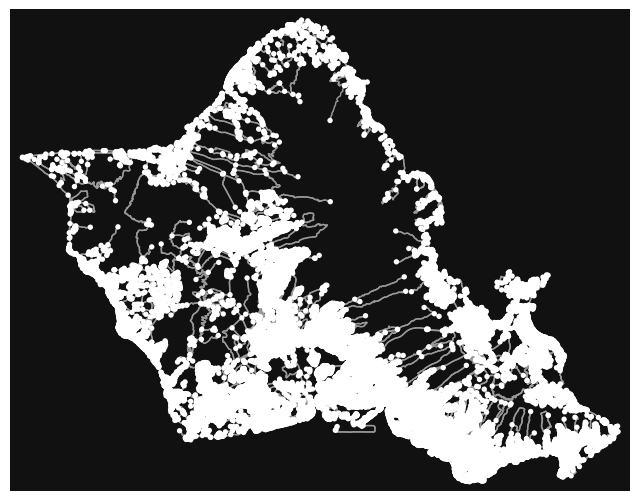

In [ ]:
# @title ### Plotting Street Info of O'ahu
fig, ax = ox.plot_graph(graph)

In [ ]:
# @title Reprojecting to the correct crs
# Project the data
graph_proj = ox.project_graph(graph)

### Edges and Nodes

In [ ]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: EPSG:32604


<Axes: >

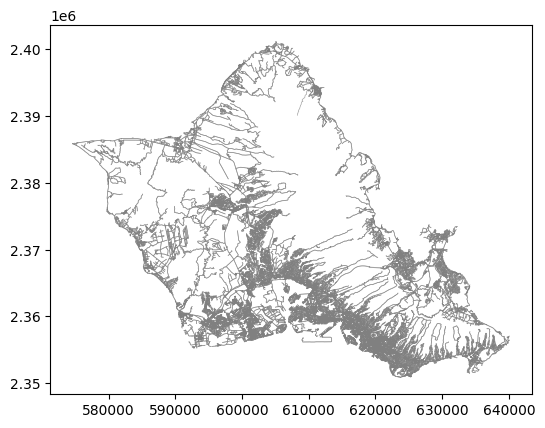

In [ ]:
# @title  ###Plotting The Streets / Buildings

# Plot street edges

edges_proj.plot(color='grey', linewidth= 0.5, alpha = 0.7)

### Extracting Residential Buildings

In [ ]:
tags = {'building':True}

In [ ]:
buildings = ox.geometries_from_place(place_name,tags)

<ipython-input-12-62352526e4b3>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place_name,tags)
/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 106 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
len(buildings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40929

In [ ]:
buildings.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

addr:state  ele gnis:county_name gnis:feature_id  \
element_type osmid                                                         
node         367803742          HI  272         Honolulu         1905158   
             367803764          HI  138         Honolulu         2097173   
             2069271240        NaN  NaN              NaN             NaN   
             5908797485         HI  NaN              NaN             NaN   
             7579297059        NaN  NaN              NaN             NaN   

                        gnis:reviewed         source  \
element_type osmid                                     
node         367803742             no  USGS Geonames   
             367803764             no  USGS Geonames   
             2069271240           NaN            NaN   
             5908797485           NaN            NaN   
             7579297059           NaN            NaN   

                                            geometry  \
element_type osmid                                     
node         367803742   POINT (-158.02720 21.50169)   
             367803764   POINT (-157.85750 21.33778)   
             2069271240  POINT (-157.79930 21.41308)   
             5908797485  POINT (-157.85128 21.30406)   
             7579297059  POINT (-157.70425 21.27707)   

                                             gnis:import_uuid  \
element_type osmid                                              
node         367803742   57871b70-0100-4405-bb30-88b2e001a944   
             367803764   57871b70-0100-4405-bb30-88b2e001a944   
             2069271240                                   NaN   
             5908797485                                   NaN   
             7579297059                                   NaN   

                                                                    name  \
element_type osmid                                                         
node         367803742                              Wahiawa Civic Center   
             367803764   Princess Bernice Pauahi Administration Building   
             2069271240                           Kaneohe Police Station   
             5908797485                Honolulu Police Department Museum   
             7579297059                                              NaN   

                        wikidata  ... disused:brand:wikidata source:name  \
element_type osmid                ...                                      
node         367803742       NaN  ...                    NaN         NaN   
             367803764       NaN  ...                    NaN         NaN   
             2069271240      NaN  ...                    NaN         NaN   
             5908797485      NaN  ...                    NaN         NaN   
             7579297059      NaN  ...                    NaN         NaN   

                        construction:amenity construction:parking  \
element_type osmid                                                  
node         367803742                   NaN                  NaN   
             367803764                   NaN                  NaN   
             2069271240                  NaN                  NaN   
             5908797485                  NaN                  NaN   
             7579297059                  NaN                  NaN   

                        construction:surface parking:access soft_drink:brand  \
element_type osmid                                                             
node         367803742                   NaN            NaN              NaN   
             367803764                   NaN            NaN              NaN   
             2069271240                  NaN            NaN              NaN   
             5908797485                  NaN            NaN              NaN   
             7579297059                  NaN            NaN              NaN   

                        cooling:method old_name:1918-1989 clli  
element_type osmid                                              
node    

In [ ]:
buildings.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['addr:state', 'ele', 'gnis:county_name', 'gnis:feature_id',
       'gnis:reviewed', 'source', 'geometry', 'gnis:import_uuid', 'name',
       'wikidata',
       ...
       'disused:brand:wikidata', 'source:name', 'construction:amenity',
       'construction:parking', 'construction:surface', 'parking:access',
       'soft_drink:brand', 'cooling:method', 'old_name:1918-1989', 'clli'],
      dtype='object', length=342)

In [ ]:
buildings['building'].unique()

array(['public', 'parking', 'yes', 'no', 'commercial', 'retail',
       'university', 'carport', 'apartments', 'house', 'garage', 'hotel',
       'industrial', 'warehouse', 'school', 'hangar', 'office',
       'fire_station', 'roof', 'college', 'toilets', 'lighthouse',
       'residential', 'hospital', 'boat', 'ship', 'boathouse',
       'sports_hall', 'church', 'dormitory', 'steps', 'greenhouse',
       'farm_auxiliary', 'basketball_gym,_gymnastics room, dance room',
       'ruins', 'service', 'hostel', 'pavilion', 'construction',
       'stadium', 'chapel', 'cabin', 'shed', 'amphitheater', 'prison',
       'military', 'garages', 'cathedral', 'civic', 'temple', 'bunker',
       'terrace', 'auditorium', 'government', 'detached', 'supermarket',
       'barn', 'kindergarten', 'storage_tank', 'hut', 'grandstand',
       'container', 'shrine', 'bridge', 'static_caravan', 'guardhouse',
       'tent', 'sports_centre', 'guard_shack', 'restaurant', 'bar'],
      dtype=object)

In [ ]:
residential = buildings.loc[buildings['building'] == 'residential']
residential

addr:state  ele gnis:county_name gnis:feature_id  \
element_type osmid                                                         
way          161726896         NaN  NaN              NaN             NaN   
             210051092         NaN  NaN              NaN             NaN   
             210051093         NaN  NaN              NaN             NaN   
             210051095         NaN  NaN              NaN             NaN   
             210051096         NaN  NaN              NaN             NaN   
...                            ...  ...              ...             ...   
             1091405051        NaN  NaN              NaN             NaN   
relation     14117004          NaN  NaN              NaN             NaN   
way          675542440         NaN  NaN              NaN             NaN   
             675542441         NaN  NaN              NaN             NaN   
             675542445         NaN  NaN              NaN             NaN   

                        gnis:reviewed source  \
element_type osmid                             
way          161726896            NaN    NaN   
             210051092            NaN    NaN   
             210051093            NaN    NaN   
             210051095            NaN    NaN   
             210051096            NaN    NaN   
...                               ...    ...   
             1091405051           NaN    NaN   
relation     14117004             NaN    NaN   
way          675542440            NaN    NaN   
             675542441            NaN    NaN   
             675542445            NaN    NaN   

                                                                  geometry  \
element_type osmid                                                           
way          161726896   POLYGON ((-157.85628 21.30870, -157.85622 21.3...   
             210051092   POLYGON ((-157.71776 21.35055, -157.71777 21.3...   
             210051093   POLYGON ((-157.71945 21.35090, -157.71946 21.3...   
             210051095   POLYGON ((-157.71877 21.35042, -157.71859 21.3...   
             210051096   POLYGON ((-157.71847 21.35050, -157.71828 21.3...   
...                                                                    ...   
             1091405051  POLYGON ((-157.86741 21.32576, -157.86736 21.3...   
relation     14117004    POLYGON ((-158.00892 21.44552, -158.00892 21.4...   
way          675542440   POLYGON ((-158.12884 21.35076, -158.12879 21.3...   
             675542441   POLYGON ((-158.12909 21.35066, -158.12916 21.3...   
             675542445   POLYGON ((-158.12904 21.35098, -158.12894 21.3...   

                        gnis:import_uuid                       name wikidata  \
element_type osmid                                                             
way          161726896               NaN  Hawaii Governor's Mansion      NaN   
             210051092               NaN                        NaN      NaN   
             210051093               NaN                        NaN      NaN   
             210051095               NaN                        NaN      NaN   
             210051096               NaN                        NaN      NaN   
...                                  ...                        ...      ...   
             1091405051              NaN                        NaN      NaN   
relation     14117004                NaN                        NaN      NaN   
way          675542440               NaN                        NaN      NaN   
             675542441               NaN                        NaN      NaN   
             675542445               NaN                        NaN      NaN   

                         ... disused:brand:wikidata source:name  \
element_type osmid       ...                                      
way          161726896   ...                    NaN         NaN   
             210051092   ...                    NaN         NaN   
             210051093   ...                    NaN         NaN   
             210051

In [ ]:
residential_proj = residential.to_crs(epsg=32604)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Residential Buildings Location Distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

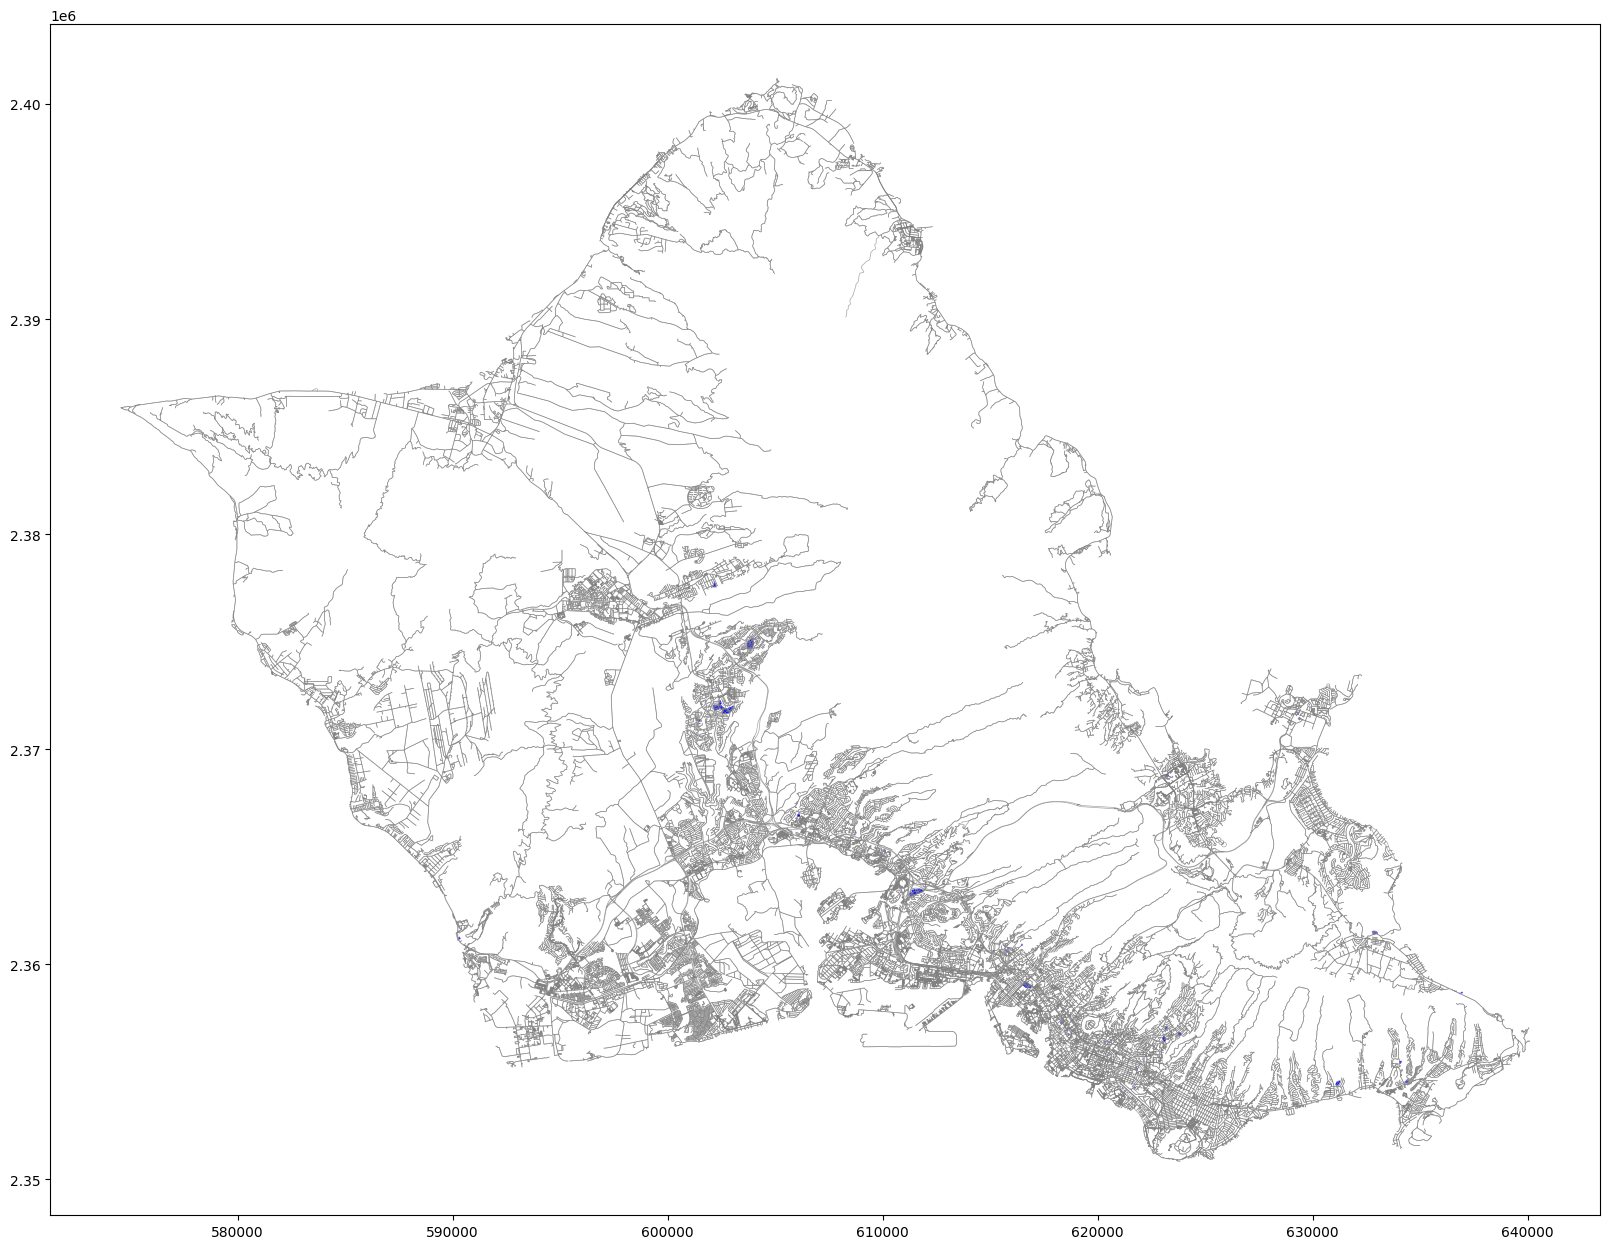

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
edges_proj.plot(ax=ax, color='grey', linewidth=0.5, alpha=0.7)
residential_proj.plot(ax=ax, edgecolor='blue', alpha=0.5, markersize=50, marker='s')

### 2 - Elevation Data

In [ ]:
elevation = gpd.read_file('Elevation.geojson')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [ ]:
elevation.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,OBJECTID,ELEVATION_FT,geometry
0,1,880,"LINESTRING (1596667.090 73566.638, 1596723.435..."
1,2,40,"LINESTRING (1594258.700 74537.073, 1594281.541..."
2,3,10,"LINESTRING (1594524.607 72431.923, 1594528.804..."
3,4,10,"LINESTRING (1593286.829 74542.804, 1593318.917..."
4,5,10,"LINESTRING (1595874.028 70177.174, 1595910.081..."


### O‘ahu Elevation Map

elevation data was in linestrings therefore buffering was utilized later in order to spatial join

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


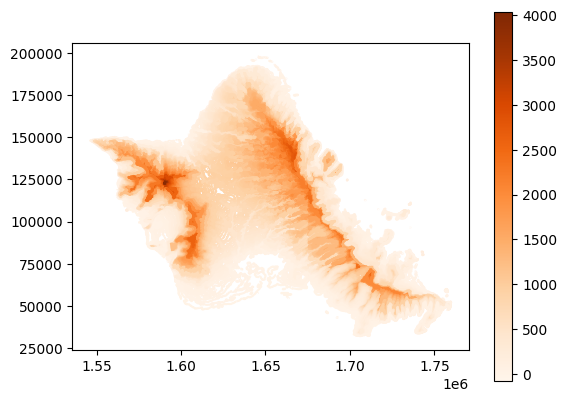

In [ ]:
# @title O'ahu Elevation Map
# Plot Elevation
elevation.plot(column='ELEVATION_FT', cmap='Oranges',legend=True)

plt.show()

### Areas At Risk

In [ ]:
# Assumming a surge height of 17 ft.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


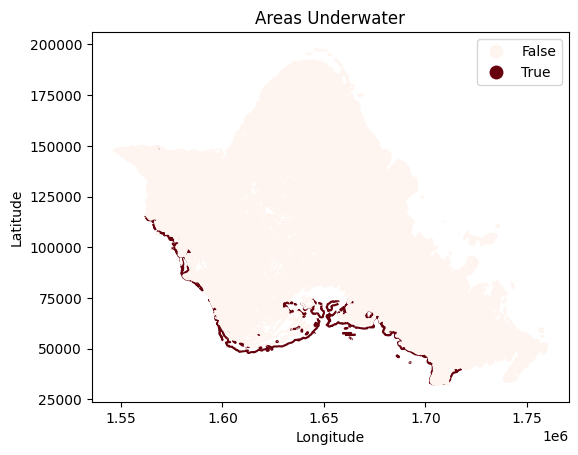

In [ ]:
# @title Areas Underwater Map
# Define surge height
surge_height = 17  # feet

# Create a new column to mark areas underwater after surge
elevation['Underwater'] = elevation['ELEVATION_FT'] <= surge_height

# Plot the elevation map with underwater areas in red
elevation.plot(column='Underwater', cmap='Reds', legend=True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Areas Underwater")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


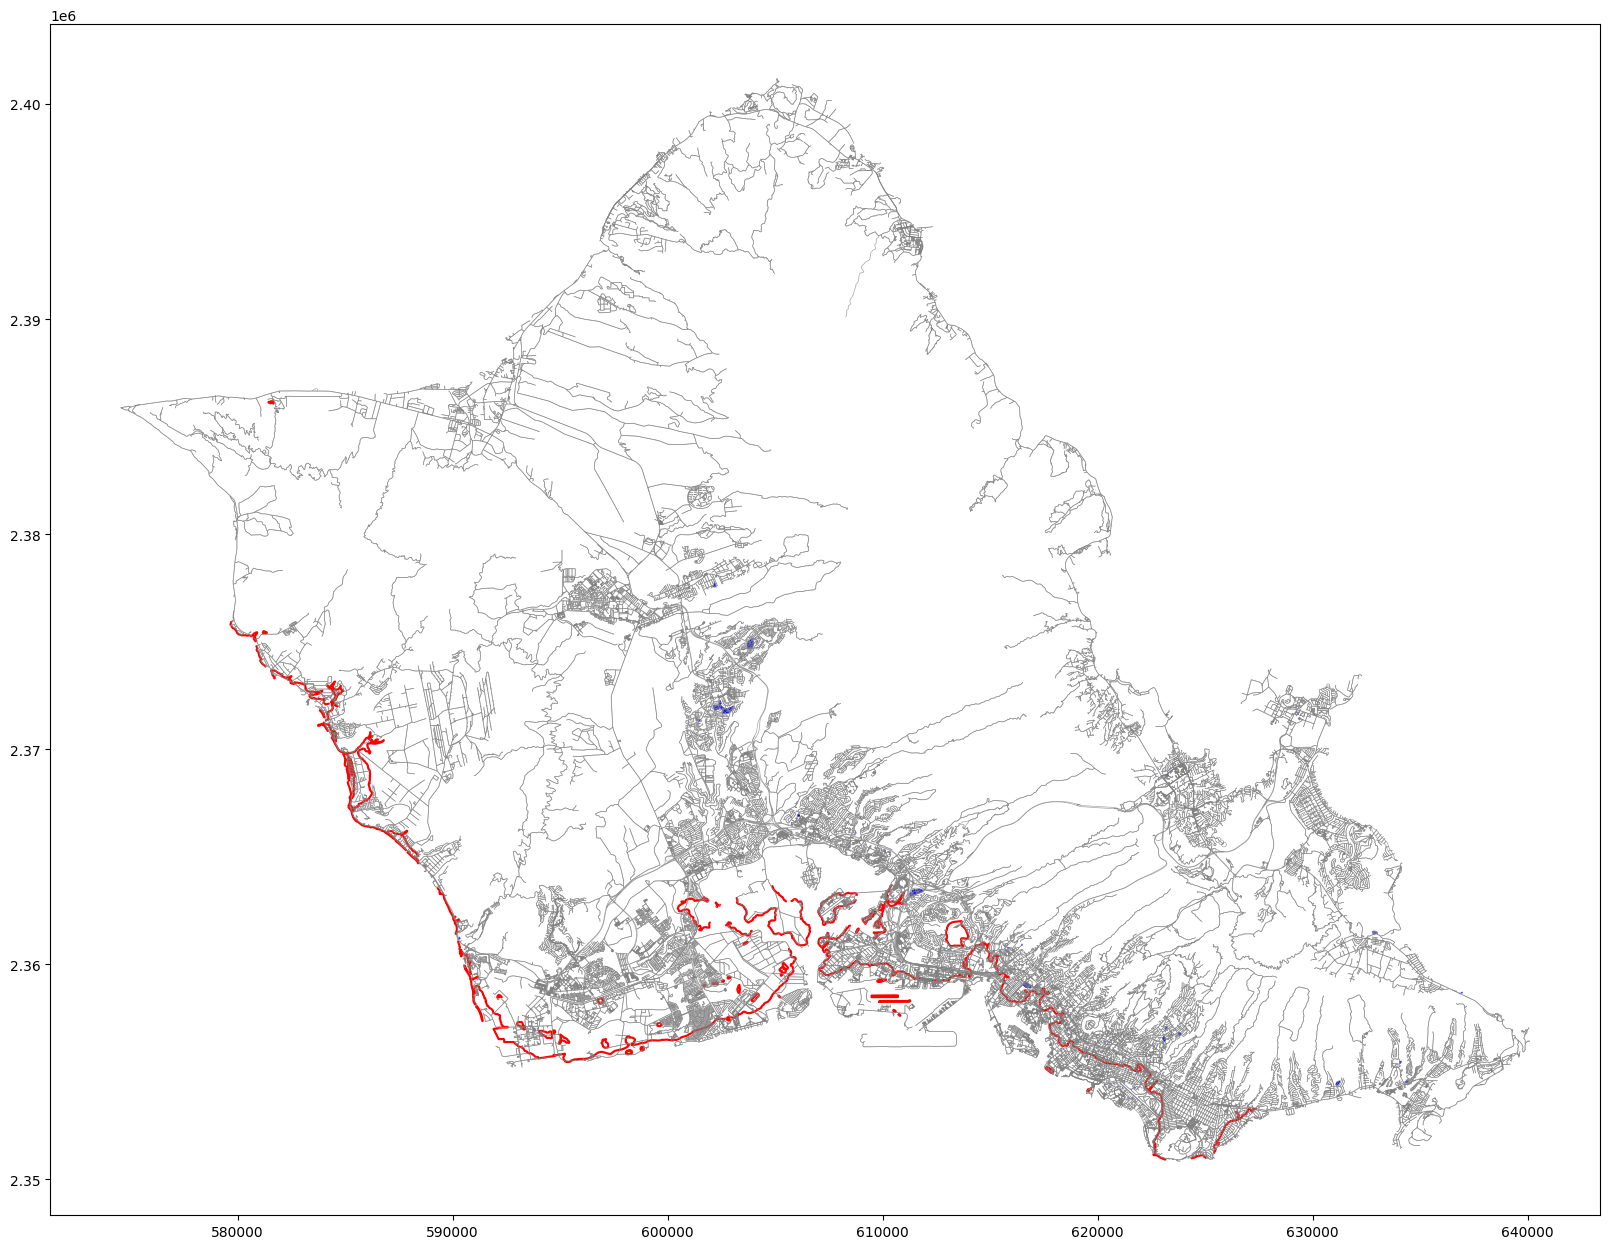

In [ ]:
# @title Roads At Risk -- Street Map View of Impact Zone
fig, ax = plt.subplots(figsize=(20, 20))


edges_proj.plot(ax=ax, color='grey', linewidth= 0.5, alpha = 0.7)
residential_proj.plot(ax=ax, edgecolor='blue', alpha=0.5, markersize=50, marker='s')

# project elevation data to EPSG:32604
elevation_proj = elevation.to_crs(epsg=32604)

# convert LineString geometries to Polygon by buffering
# elevation is linestring; need buffer method
elevation_proj['geometry'] = elevation_proj['geometry'].buffer(50)

# filter out only Polygon geometries for areas underwater
underwater_polygons = elevation_proj[elevation_proj['Underwater'] & (elevation_proj.geom_type == 'Polygon')]

# plot areas underwater on top of street edges map
underwater_polygons.plot(ax=ax, color='red', alpha=1)

plt.show()

In [ ]:
# @title Residential Buildings At Risk
# Spatial join between underwater polygons and residential areas
residential_underwater = gpd.sjoin(residential_proj, underwater_polygons[['geometry']], how='inner', op='intersects')

residential_underwater_proj = residential_underwater.to_crs(epsg=32604)

residential_underwater_proj

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


addr:state  ele gnis:county_name gnis:feature_id  \
element_type osmid                                                         
way          311848506          HI  NaN              NaN             NaN   
             442978230          HI  NaN              NaN             NaN   
             1091405051        NaN  NaN              NaN             NaN   

                        gnis:reviewed source  \
element_type osmid                             
way          311848506            NaN    NaN   
             442978230            NaN    NaN   
             1091405051           NaN    NaN   

                                                                  geometry  \
element_type osmid                                                           
way          311848506   POLYGON ((618292.428 2357297.030, 618287.486 2...   
             442978230   POLYGON ((621813.979 2355157.301, 621800.885 2...   
             1091405051  POLYGON ((617457.503 2358622.870, 617461.859 2...   

                        gnis:import_uuid                          name  \
element_type osmid                                                       
way          311848506               NaN                   Kukui Tower   
             442978230               NaN  Hawaii Young Buddhist Center   
             1091405051              NaN                           NaN   

                        wikidata  ... source:name construction:amenity  \
element_type osmid                ...                                    
way          311848506       NaN  ...         NaN                  NaN   
             442978230       NaN  ...         NaN                  NaN   
             1091405051      NaN  ...         NaN                  NaN   

                        construction:parking construction:surface  \
element_type osmid                                                  
way          311848506                   NaN                  NaN   
             442978230                   NaN                  NaN   
             1091405051                  NaN                  NaN   

                        parking:access soft_drink:brand cooling:method  \
element_type osmid                                                       
way          311848506             NaN              NaN            NaN   
             442978230             NaN              NaN            NaN   
             1091405051            NaN              NaN            NaN   

                        old_name:1918-1989 clli index_right  
element_type osmid                                           
way          311848506                 NaN  NaN        5271  
             442978230                 NaN  NaN        5173  
             1091405051                NaN  NaN        5134  

[3 rows x 343 columns]

### Folium Map Visualization

In [ ]:
# @title Folium Map

import folium
from shapely.geometry import Polygon
m = folium.Map(location=[21.3069, -157.8583], tiles='cartodb positron', zoom_start=12, control_scale=True, prefer_canvas=True)  # Honolulu coordinates
residential_underwater_geojson = residential_underwater_proj.to_crs(epsg='4326').to_json()
folium.GeoJson(
    residential_underwater_geojson,
    name='Residential Underwater',
    style_function=lambda x: {'fillColor': '#ff0000', 'color': '#ff0000'},
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Name'])
).add_to(m)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Residential Buildings Underwater

m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3 - Airbnb Data

https://insideairbnb.com/get-the-data

In [ ]:
# @title Converting Airbnb listings csv into geojson
df = pd.read_csv('airbnb/listings.csv')
df['geometry'] = df.apply(lambda row: f"POINT ({row['longitude']} {row['latitude']})", axis=1)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']), crs="EPSG:4326")
gdf.drop(columns=['longitude', 'latitude'], inplace=True)
geojson_str = gdf.to_json()
with open('output.geojson', 'w') as f:
    f.write(geojson_str)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


### Reading and reprojection of airbnb data

In [ ]:
airbnb = gpd.read_file('output.geojson')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
airbnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,34421962,Waipouli Beach Resort E106,34386367,Kauai Calls!,Kauai,Kapaa-Wailua,Entire home/apt,417.0,1,0,None,NaN,41,243,0,430080010111,POINT (-159.31918 22.06228)
1,40707945,DO NOT PUBLISH BEFORE MERGING 14891-HROV,182704096,Aston Waikiki Beach Hotel,Honolulu,Primary Urban Center,Private room,290.0,1,0,None,NaN,9,365,0,None,POINT (-157.82256 21.27244)
2,43656551,"Ilikai 1212 Ocean / Lagoon / King Bed, Sofa Bed",347952914,Hawaii Vacation,Honolulu,Primary Urban Center,Entire home/apt,199.0,1,52,2024-02-20,1.51,79,145,13,Exempt,POINT (-157.83844 21.28437)
3,39096262,$900 rooms for rent,299657655,Chelsea,Honolulu,Primary Urban Center,Private room,NaN,365,0,None,NaN,1,0,0,None,POINT (-157.87816 21.34029)
4,735005738415289686,"The Point at Poipu, a Hilton Vacation Club, Kauai",24157156,David,Kauai,Koloa-Poipu,Private room,NaN,7,0,None,NaN,1,353,0,"280210001000, TA-124-323-5840-01",POINT (-159.44167 21.87067)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34044,755988499595645037,"Kona Coast Resort 1 Bedroom, full kitchen",457152913,Todd,Hawaii,North Kona,Entire home/apt,NaN,2,3,2024-02-24,0.21,85,89,1,None,POINT (-155.96811 19.58293)
34045,756678668207738929,Stunning *Paniolo Greens* 2B#3,340080088,Bianka,Hawaii,South Kohala,Entire home/apt,NaN,2,0,None,NaN,68,0,0,None,POINT (-155.79399 19.92762)
34046,969798240699256199,Thanksgiving in Kauai - 2bd/2ba,462468097,Shariq,Kauai,Lihue,Private room,NaN,5,0,None,NaN,1,0,0,"350020020143, TA-350-020-0201-43",POINT (-159.34991 21.96210)
34047,887965228349983780,Beautiful & Relaxing Holua Resort - 2 Bedroom,52178915,Jim,Hawaii,North Kona,Entire home/apt,NaN,2,1,2023-08-02,0.13,29,0,1,None,POINT (-155.96195 19.55730)


In [ ]:
neighbourhoods = gpd.read_file('airbnb/neighbourhoods_hawaii.geojson')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
neighbourhoods

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,neighbourhood,neighbourhood_group,geometry
0,Koolauloa,Honolulu,"MULTIPOLYGON (((-158.00347 21.69941, -158.0028..."
1,North Shore Oahu,Honolulu,"MULTIPOLYGON (((-158.02224 21.69103, -158.0219..."
2,Waianae,Honolulu,"MULTIPOLYGON (((-158.26744 21.57220, -158.2673..."
3,Koolaupoko,Honolulu,"MULTIPOLYGON (((-157.83830 21.53446, -157.8381..."
4,Central Oahu,Honolulu,"MULTIPOLYGON (((-157.92108 21.53219, -157.9209..."
5,North Shore Kauai,Kauai,"MULTIPOLYGON (((-159.40448 22.22918, -159.4044..."
6,Kapaa-Wailua,Kauai,"MULTIPOLYGON (((-159.33158 22.19300, -159.3313..."
7,Waimea-Kekaha,Kauai,"MULTIPOLYGON (((-159.69701 22.16169, -159.6970..."
8,Lihue,Kauai,"MULTIPOLYGON (((-159.45149 22.06189, -159.4476..."
9,Hanapepe-Eleele,Kauai,"MULTIPOLYGON (((-159.50306 22.05268, -159.4991..."


In [ ]:
airbnb = airbnb.to_crs(epsg=32604)
neighbourhoods = neighbourhoods.to_crs(epsg=32604)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

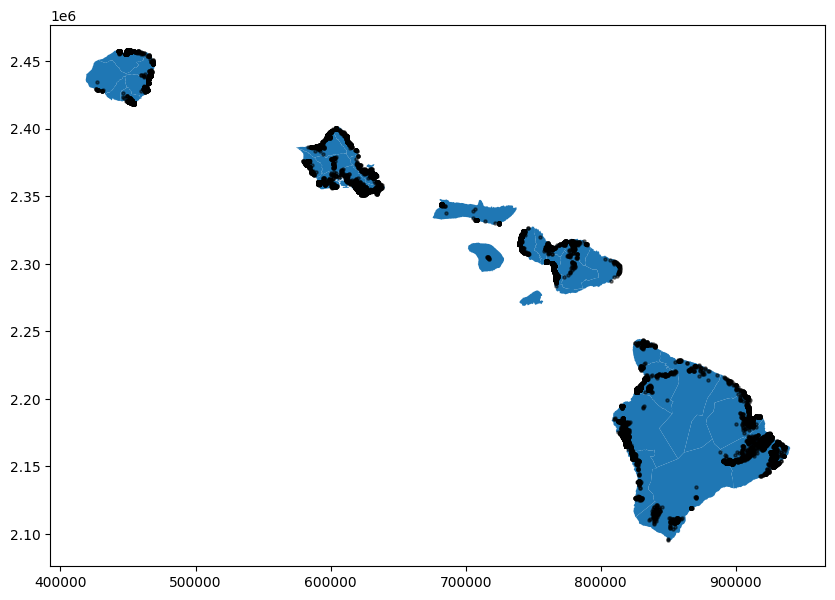

In [ ]:
# @title All airbnb listings -- most dense in o'ahu
# Plot the two datasets
ax = neighbourhoods.plot(legend = True, categorical=True, figsize=(10,10))
airbnb.plot(ax=ax, c='k', alpha=0.5, markersize=5)


### Filter O'ahu

In [ ]:
neighbourhoods_filtered = neighbourhoods[neighbourhoods['neighbourhood_group'] == 'Honolulu']
airbnb_filtered = airbnb[airbnb['neighbourhood_group'] == 'Honolulu']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Oahu airbnb listings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

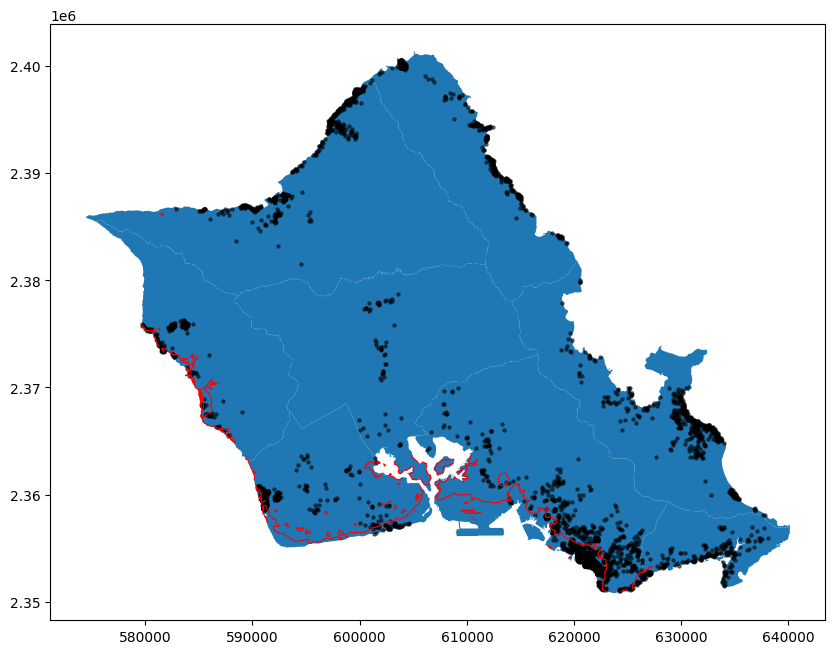

In [ ]:
ax = neighbourhoods_filtered.plot(legend=True, categorical=True, figsize=(10, 10))
airbnb_filtered.plot(ax=ax, c='k', alpha=0.5, markersize=5)
underwater_polygons.plot(ax=ax, color='red', alpha=1)

### Airbnbs at risk

In [ ]:
airbnb_underwater = gpd.sjoin(airbnb_filtered, underwater_polygons[['geometry']], how='inner', op='intersects')

airbnb_underwater_proj = airbnb_underwater.to_crs(epsg=4326)

airbnb_underwater_proj

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right
25,30112716,Modern studio in Ewa.,226267327,Maili,Honolulu,Ewa,Entire home/apt,85.0,30,63,2024-01-13,0.98,2,80,5,None,POINT (-158.02068 21.31224),12162
18696,13924752,Westside Bungalow,54259635,Laya,Honolulu,Ewa,Entire home/apt,63.0,30,51,2023-02-28,0.57,1,250,0,007-985-3568-01,POINT (-158.02140 21.31164),12162
23777,31568295,"Beautiful House, Beaches, Surfing, Golf, AC, W...",209373336,Milena,Honolulu,Ewa,Entire home/apt,NaN,30,12,2022-10-07,0.20,1,0,0,"910371490000, TA-026-129-3568-01",POINT (-158.00841 21.31706),12162
33301,882638644985114234,Poolside Garden Suite,515075427,Charlotte,Honolulu,Ewa,Entire home/apt,143.0,2,27,2024-03-06,2.91,2,185,27,"300569842313, Unit 1, TA-123-456-7890-13",POINT (-158.01887 21.31244),12162
49,46087776,Marriott Ko Olina Studio - King Bed & sofa sle...,21151404,Chesley,Honolulu,Ewa,Entire home/apt,500.0,6,0,None,NaN,5,358,0,None,POINT (-158.12190 21.32848),18323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28102,975035351250558065,206 Private RM Downtown Honolulu,366621778,Robello,Honolulu,Primary Urban Center,Private room,35.0,30,0,None,NaN,59,269,0,"150060400000, 206, TA-157-093-2736-01",POINT (-157.86682 21.31906),5134
28111,49246049,214 affordable downtown HNL across Costco and HCC,366621778,Robello,Honolulu,Primary Urban Center,Private room,35.0,30,4,2022-12-17,0.12,59,339,0,None,POINT (-157.86865 21.32025),5134
28112,672480798042875959,333 Affordable Private Rm Downtown Near Costco...,366621778,Robello,Honolulu,Primary Urban Center,Private room,35.0,30,1,2023-01-05,0.07,59,364,0,"150060400000, 333, TA-157-093-2736-01",POINT (-157.86774 21.31892),5134
28136,47478369,308 affordable private room nearby downtown Co...,366621778,Robello,Honolulu,Primary Urban Center,Private room,35.0,30,2,2022-02-20,0.07,59,365,0,TAT 157093273601 GE 1570932736,POINT (-157.86656 21.31902),5134


In [ ]:
m2 = folium.Map(location=[21.3069, -157.8583], tiles='cartodb positron', zoom_start=12, control_scale=True, prefer_canvas=True)  # Honolulu coordinates


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, row in airbnb_underwater_proj.iterrows():
    folium.Marker(location=[row['geometry'].y, row['geometry'].x],
                  tooltip=row['name'],
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(m2)

### Airbnb At Risk

In [ ]:
m2

In [ ]:
# @title Where are these airbnbs located?
airbnb_underwater_proj['neighbourhood'].unique()

array(['Ewa', 'Primary Urban Center', 'Waianae'], dtype=object)

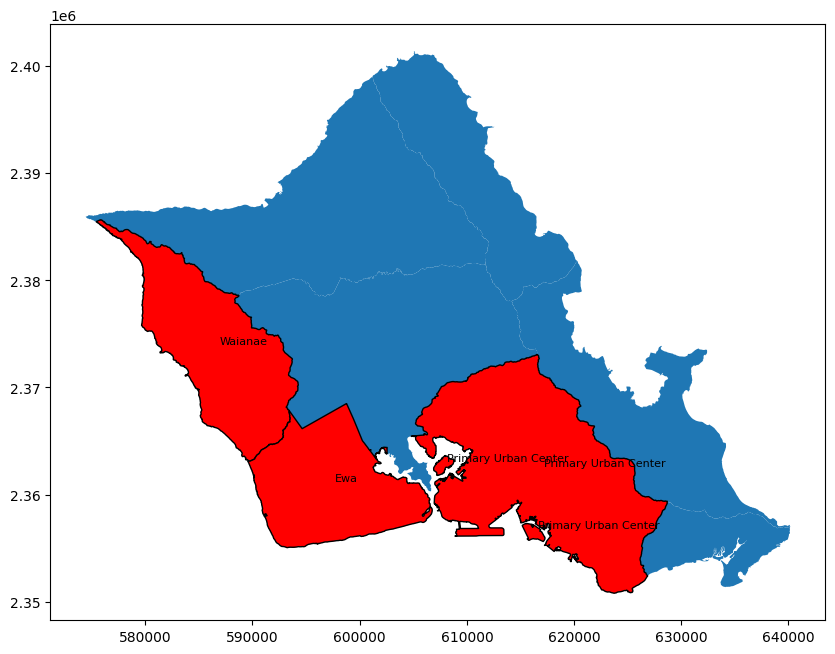

In [ ]:
# @title districts with airbnb at risk

#  neighborhoods to highlight
highlighted_neighborhoods = neighbourhoods_filtered[neighbourhoods_filtered['neighbourhood'].isin(['Ewa', 'Primary Urban Center', 'Waianae'])]

ax = neighbourhoods_filtered.plot(legend=True, categorical=True, figsize=(10, 10))

highlighted_neighborhoods.plot(ax=ax, color='red', edgecolor='black', linewidth=1)

for idx, row in highlighted_neighborhoods.iterrows():
    plt.annotate(text=row['neighbourhood'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

plt.show()

## Shortest Paths Analysis -- Evacuation

### honolulu city network and firestation info

In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
place_name2 = "Honolulu, Honolulu County, Hawaii, United States"
graph2 = ox.graph_from_place(place_name2, network_type='walk')

In [ ]:
fire_station = buildings.loc[buildings['building'] == 'fire_station']
fire_station_proj = fire_station.to_crs(epsg=32604)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
m3 = folium.Map(location=[21.3069, -157.8583], tiles='cartodb positron', zoom_start=12, control_scale=True, prefer_canvas=True)  # Honolulu coordinates
firestation_geojson = fire_station_proj.to_crs(epsg='4326').to_json()
folium.GeoJson(
    firestation_geojson,
    name='Fire Station',
    style_function=lambda x: {'fillColor': '#ff0000', 'color': '#ff0000'},
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Name'])
).add_to(m3)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Fire station Map

In [ ]:
# @title Firestation Map

m3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### shortest distance calculation: nearest firestation to each airbnb underwater

In [ ]:
fire_station_copy = fire_station.copy()
airbnb_underwater_proj_copy = airbnb_underwater_proj.copy()

# centroids
fire_station_copy.loc[:, 'centroid'] = fire_station_copy['geometry'].to_crs(epsg=32604).centroid

# nearest nodes for fire stations
fire_station_copy.loc[:, 'nearest_firestation_node'] = fire_station_copy['centroid'].apply(lambda x: ox.distance.nearest_nodes(graph2, x.x, x.y))

airbnb_underwater_proj_copy.loc[:, 'geometry'] = airbnb_underwater_proj_copy['geometry'].to_crs(epsg=32604)

#nearest nodes for airbnb locations
airbnb_underwater_proj_copy.loc[:, 'nearest_airbnb_node'] = airbnb_underwater_proj_copy['geometry'].apply(lambda x: ox.distance.nearest_nodes(graph2, x.x, x.y))



In [ ]:
# Get the first Airbnb node
first_airbnb_node = airbnb_underwater_proj_copy['nearest_airbnb_node'].iloc[0]

# Calculate the distances from each fire station node to the first Airbnb node
fire_station_copy['distance_to_airbnb'] = fire_station_copy['nearest_firestation_node'].apply(lambda x: nx.shortest_path_length(graph2, source=x, target=first_airbnb_node, weight='length'))

# Find the closest fire station node to the first Airbnb node
closest_firestation_node = fire_station_copy.loc[fire_station_copy['distance_to_airbnb'].idxmin(), 'nearest_firestation_node']

print(f"Closest fire station node to the first Airbnb node: {closest_firestation_node}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Closest fire station node to the first Airbnb node: 6580377671


In [ ]:

# Get the first Airbnb node
first_airbnb_node = airbnb_underwater_proj_copy['nearest_airbnb_node'].iloc[0]

# Calculate the distances from each fire station node to the first Airbnb node
fire_station_copy['distance_to_airbnb'] = fire_station_copy['nearest_firestation_node'].apply(lambda x: nx.shortest_path_length(graph2, source=x, target=first_airbnb_node, weight='length'))

# Find the closest fire station node to the first Airbnb node
closest_firestation_node = fire_station_copy.loc[fire_station_copy['distance_to_airbnb'].idxmin(), 'nearest_firestation_node']

# Add a new column 'node ID of the closest_firestation' to airbnb_underwater_proj_copy
airbnb_underwater_proj_copy['node_ID_of_the_closest_firestation'] = closest_firestation_node

# Display the updated airbnb_underwater_proj_copy DataFrame
airbnb_underwater_proj_copy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,nearest_airbnb_node,node_ID_of_the_closest_firestation
25,30112716,Modern studio in Ewa.,226267327,Maili,Honolulu,Ewa,Entire home/apt,85.0,30,63,2024-01-13,0.98,2,80,5,None,POINT (601570.05341 2357020.23981),12162,6580377671,6580377671
18696,13924752,Westside Bungalow,54259635,Laya,Honolulu,Ewa,Entire home/apt,63.0,30,51,2023-02-28,0.57,1,250,0,007-985-3568-01,POINT (601495.78562 2356953.36274),12162,2627549107,6580377671
23777,31568295,"Beautiful House, Beaches, Surfing, Golf, AC, W...",209373336,Milena,Honolulu,Ewa,Entire home/apt,NaN,30,12,2022-10-07,0.20,1,0,0,"910371490000, TA-026-129-3568-01",POINT (602839.37192 2357561.71790),12162,2484584160,6580377671
33301,882638644985114234,Poolside Garden Suite,515075427,Charlotte,Honolulu,Ewa,Entire home/apt,143.0,2,27,2024-03-06,2.91,2,185,27,"300569842313, Unit 1, TA-123-456-7890-13",POINT (601757.84139 2357043.68737),12162,6580377671,6580377671
49,46087776,Marriott Ko Olina Studio - King Bed & sofa sle...,21151404,Chesley,Honolulu,Ewa,Entire home/apt,500.0,6,0,None,NaN,5,358,0,None,POINT (591061.37245 2358755.93441),18323,2627549107,6580377671


###Point Pattern Analysis

---

 DBSCAN

First, how many clusters are there for airbnb's at risk?

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

coords = np.array([(point.x, point.y) for point in airbnb_underwater_proj_copy['geometry']])


dbscan = DBSCAN(eps=1000, min_samples=3)
labels = dbscan.fit_predict(coords)


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")


airbnb_underwater_proj_copy['cluster'] = labels




Number of clusters: 11


Text(0.5, 1.0, 'DBSCAN Clustering of Airbnb Underwater Data Points')

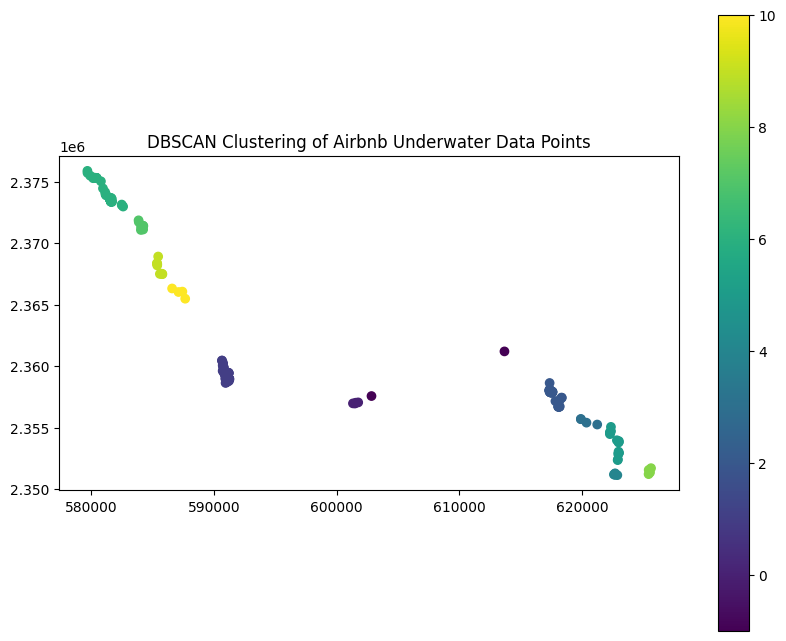

In [ ]:
#@title Visualize the clusters
fig, ax = plt.subplots(figsize=(10, 8))
airbnb_underwater_proj_copy.plot(column='cluster', cmap='viridis', ax=ax, legend=True, aspect='equal')
plt.title('DBSCAN Clustering of Airbnb Underwater Data Points')

In [ ]:
#@title Mapping clusters
coords = np.array([(point.y, point.x) for point in airbnb_underwater_proj['geometry']])

dbscan = DBSCAN(eps=1000, min_samples=3)
labels = dbscan.fit_predict(coords)

airbnb_underwater_proj['cluster'] = labels.astype(str)

cluster_centers = {}
for label in set(labels):
    if label != -1:
        cluster_points = coords[labels == label]
        cluster_centers[label] = np.mean(cluster_points, axis=0)


m4 = folium.Map(location=[21.3069, -157.8583], tiles='cartodb positron', zoom_start=12, control_scale=True, prefer_canvas=True)

cluster_colors = {
    '-1': 'gray',
    '0': 'blue',
    '1': 'red',
    '2': 'green',
    '3': 'orange',
    '4': 'purple',
    '5': 'pink',
    '6': 'yellow',
    '7': 'cyan',
    '8': 'magenta',
    '9': 'lightgreen',
    '10': 'lightblue',

}

for label, center in cluster_centers.items():
    folium.Marker(location=(center[0], center[1]),
                  tooltip=f"Cluster {label}",
                  icon=folium.Icon(color=cluster_colors[str(label)], icon='info-sign')).add_to(m4)



##Visualize the clusters on the map:

In [ ]:
m4

In [ ]:
# @title Nearests Firestations Nodes
selected_columns = ['name', 'nearest_airbnb_node', 'node_ID_of_the_closest_firestation']
airbnb_underwater_proj_copy[selected_columns]

,name,nearest_airbnb_node,node_ID_of_the_closest_firestation
25,Modern studio in Ewa.,6580377671,6580377671
18696,Westside Bungalow,2627549107,6580377671
23777,"Beautiful House, Beaches, Surfing, Golf, AC, W...",2484584160,6580377671
33301,Poolside Garden Suite,6580377671,6580377671
49,Marriott Ko Olina Studio - King Bed & sofa sle...,2627549107,6580377671
...,...,...,...
28102,206 Private RM Downtown Honolulu,1604668693,6580377671
28111,214 affordable downtown HNL across Costco and HCC,5455392084,6580377671
28112,333 Affordable Private Rm Downtown Near Costco...,8668128744,6580377671
28136,308 affordable private room nearby downtown Co...,1604668693,6580377671



###Conculsion
---

In conclusion, airbnbs at risk are still relatively safe as firestations will have timely response to emergencies due to the firestation to airbnb ratio as well as the short distances.